In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from imp import reload
import sys
import scipy.special as sp

sys.path.append('../')
import mg_si
from mg_si import plot as mplt
reload(mg_si)
reload(mg_si.planet)
reload(mg_si.core)
reload(mg_si.mantle)

reload(mplt)

<module 'mg_si.plot' from '../mg_si/plot.py'>

In [2]:
pl = mg_si.planet.Custom()

In [5]:
# times = np.linspace(0,1000e6*365.25*24*3600,1000)
times = np.linspace(0,4568e6*365.25*24*3600,30000)
T_cmb0 = 6500
pl.mantle_layer.params.mantle.T_s = 750
T_um0 = pl.mantle_layer.get_Tum0(T_cmb0)*.9

pl.reactions._set_layer_thickness(300)
x0 = [T_cmb0, T_um0]

## Initial Core State
X_Mg_0 = 0.04
X_Si_0 = 0.08
X_O_0 = 0.12
Moles_0 = pl.reactions.compute_Moles_0(X_Mg_0, X_Si_0, X_O_0, T_cmb0)

### background mantle state
fraction_MgFe_b = 0.9
X_MgFeO_b = 0.16
X_SiO2_b = 0.01
Kd_Pv_Fp = 0.1

Mm_b = pl.reactions.mantle.compute_Mm_b(fraction_MgFe_b, X_MgFeO_b, X_SiO2_b,Kd_Pv_Fp)

pl.params.reactions.Moles_0 = Moles_0
pl.params.reactions.Mm_b = Mm_b
pl.reactions._set_overturn_time(800)

x0 = x0+Moles_0

# nu_present = 10**21/pl.params.mantle.rho #[m^2/s]
nu_present = 10**21/pl.params.mantle.rho #[m^2/s]
T_present = 1750 # [K]
nu_old =  nu_present/1e3
T_old = T_um0
A,nu0 = pl.mantle_layer.find_arrenhius_params(nu_present, T_present, nu_old, T_old, set_values=True)


In [6]:
solution = pl.integrate(times, x0)

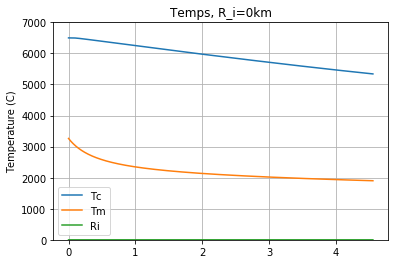

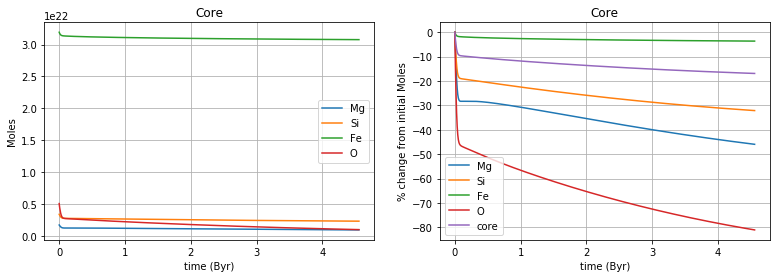

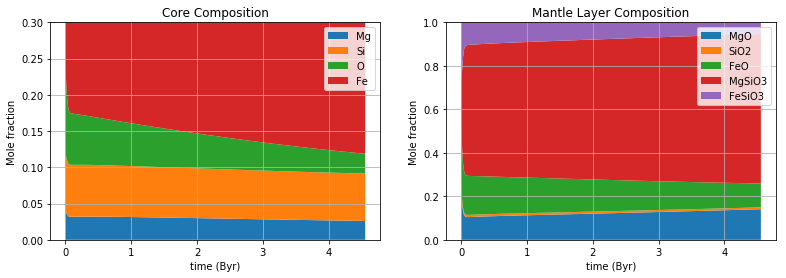

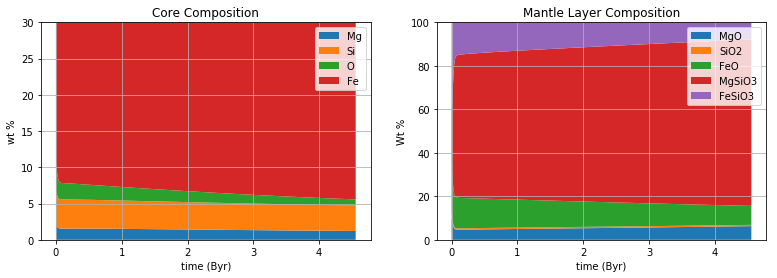

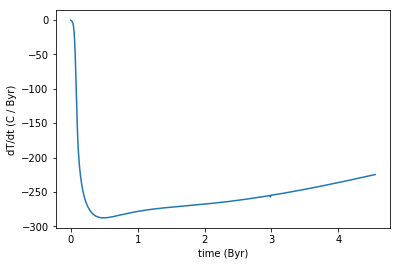

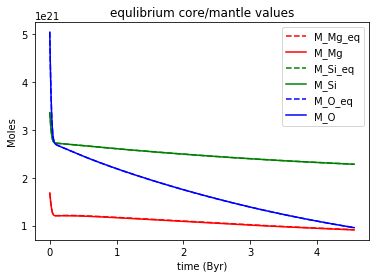

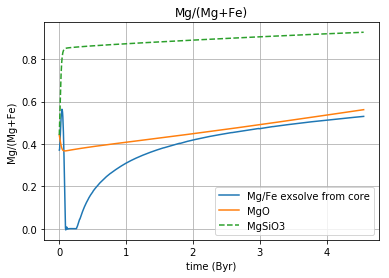

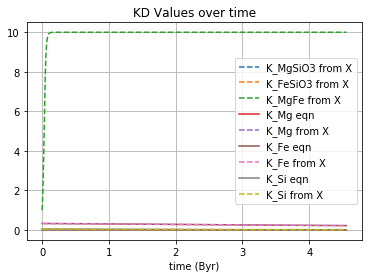

In [7]:
mplt.temperature(pl, times, solution, savename='temperature.png')
mplt.coremoles(pl, times, solution, savename='coremoles.png')
mplt.composition(pl, times, solution, savename='composition.png')
mplt.composition_wt(pl, times, solution, savename='composition_wt.png')
mplt.dTdt(pl, times, solution, savename=None)
mplt.MgSiOequilibrium(pl, times, solution, savename=None)
mplt.MgFefraction(pl, times, solution, savename=None)
mplt.K_vals(pl, times, solution, savename=None)

#plt.close('all')

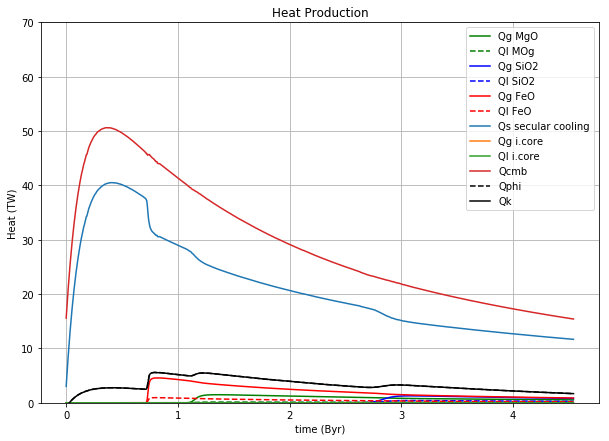

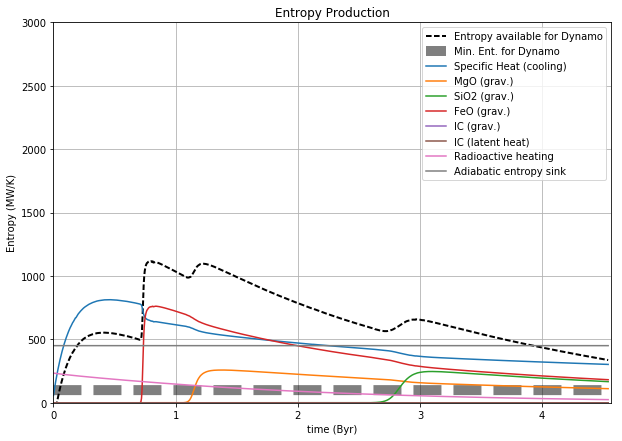

In [110]:
t_N,all_parameters = pl.core_layer.compute_all_parameters(times, solution)
mplt.Q_all(pl, t_N, all_parameters, savename='HeatFlow.png')
mplt.E_all(pl, t_N, all_parameters, savename='Entropy.png')


In [45]:
T_um0

3624.90924903

In [44]:
pl.mantle_layer.params.mantle.T_s

750.0

# Compute Moles 0

In [ ]:
T_cmb = T_cmb0
X_Mg_0 = 0.025
X_Si_0 = 0.025
X_O_0 = 0.15

X_Fe = 1 - X_Mg - X_Si - X_O
X_c = np.array([X_Mg, X_Si, X_Fe, X_O])
K4, _ = pl.reactions.func_KD_MgO_val(T_cmb)
K5, _ = pl.reactions.func_KD_FeO_val(T_cmb)
K6, _ = pl.reactions.func_KD_SiO2_val(X_Si, X_O, T_cmb)
X_MgO = X_Mg * X_O / K4
X_FeO = X_Fe * X_O / K5
X_SiO2 = X_Si * X_O ** 2 / K6
X_FeSiO3 = (1 - X_MgO - X_FeO - X_SiO2) / (1 + X_MgO / X_FeO)
X_MgSiO3 = 1 - X_MgO - X_FeO - X_SiO2 - X_FeSiO3
X_m = np.array([X_MgO, X_SiO2, X_FeO, X_MgSiO3, X_FeSiO3])

In [ ]:
print(X_MgO/X_FeO, X_MgSiO3/X_FeSiO3)

In [ ]:
pl.reactions.mantle.species

In [ ]:
Mt = pl.reactions.mantle.Xwtot2Mtot(X_m, 1)
pl.reactions.mantle.XMtot2wtot(X_m, Mt)

In [ ]:
M_m = pl.reactions.mantle.X2M(X_m, wt_tot=pl.params.reactions.mass_l_0)

In [ ]:
X_MgO = M_m[0] / np.sum(M_m)
X_SiO2 = M_m[1]/ np.sum(M_m)
X_FeO = M_m[2]/ np.sum(M_m)
X_MgSiO3 = M_m[3] / np.sum(M_m)
X_FeSiO3 = M_m[4] / np.sum(M_m)


In [ ]:
print(X_MgO/X_FeO, X_MgSiO3/X_FeSiO3)

In [ ]:
Moles_0 = pl.reactions.compute_Moles_0(X_Mg_0, X_Si_0, X_O_0, T_cmb0)

M_c, M_m = pl.reactions.unwrap_Moles(Moles_0, return_sum=True, split_coremantle=True)

In [ ]:
X_Mg = M_c[0] / M_c[4]
X_Si = M_c[1] / M_c[4]
X_Fe = M_c[2] / M_c[4]
X_O = M_c[3] / M_c[4]

X_MgO = M_m[0] / M_m[5]
X_FeO = M_m[1]/ M_m[5]
X_SiO2 = M_m[2]/ M_m[5]
X_MgSiO3 = M_m[3] / M_m[5]
X_FeSiO3 = M_m[4] / M_m[5]

K1 = X_MgO * X_SiO2 / X_MgSiO3
K2 = X_FeO * X_SiO2 / X_FeSiO3
K3 = X_FeO * X_MgSiO3 / (X_MgO * X_FeSiO3)
K4 = X_Mg * X_O / X_MgO
K5 = X_Fe * X_O / X_FeO
K6 = X_Si * X_O ** 2 / X_SiO2

In [ ]:
print(X_MgO/X_FeO, X_MgSiO3/X_FeSiO3)